In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from pandas import read_csv

In [4]:
# Importing Dataset
A = read_csv("Mall_Customers.csv")

In [5]:
A.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Dropping the irrelevant columns
B = A.drop(["CustomerID"], axis = 1)

In [7]:
A.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
B.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
#Label encoding
# Import label encoder
from sklearn import preprocessing

In [10]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [11]:
# Encode labels in column 'species'.
B['Genre'] = label_encoder.fit_transform(B['Genre'])

In [12]:
B['Genre'].unique()

array([1, 0])

In [13]:
from sklearn.cluster import KMeans

In [14]:
cluster = []

In [15]:
for k in range(1, 11):
    kmean = KMeans(n_clusters = k).fit(B)
    cluster.append(kmean.inertia_)

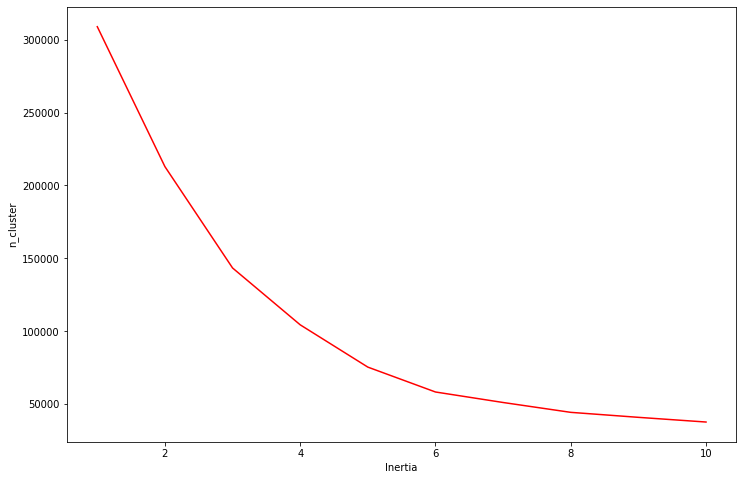

In [16]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, 11), cluster, 'r-')
plt.xlabel('Inertia')
plt.ylabel('n_cluster')
plt.show()

In [17]:
km = KMeans(n_clusters = 5).fit(B)

In [18]:
B['Labels'] = km.labels_

/home/pict/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


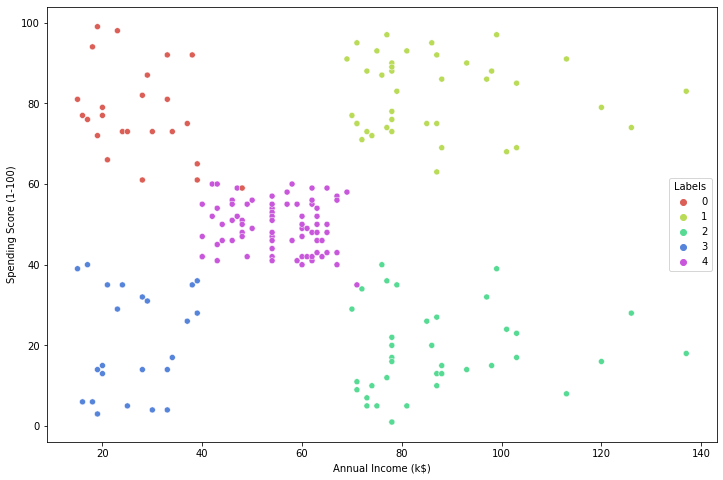

In [19]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.scatterplot(B['Annual Income (k$)'], B['Spending Score (1-100)'], hue = B['Labels'], palette = sns.color_palette('hls', 5))
plt.show()

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
x = B['Annual Income (k$)']

In [23]:
y = B['Spending Score (1-100)']

In [24]:
data = list(zip(x,y))

In [26]:
linkage_data = linkage(data, method='ward', metric='euclidean')

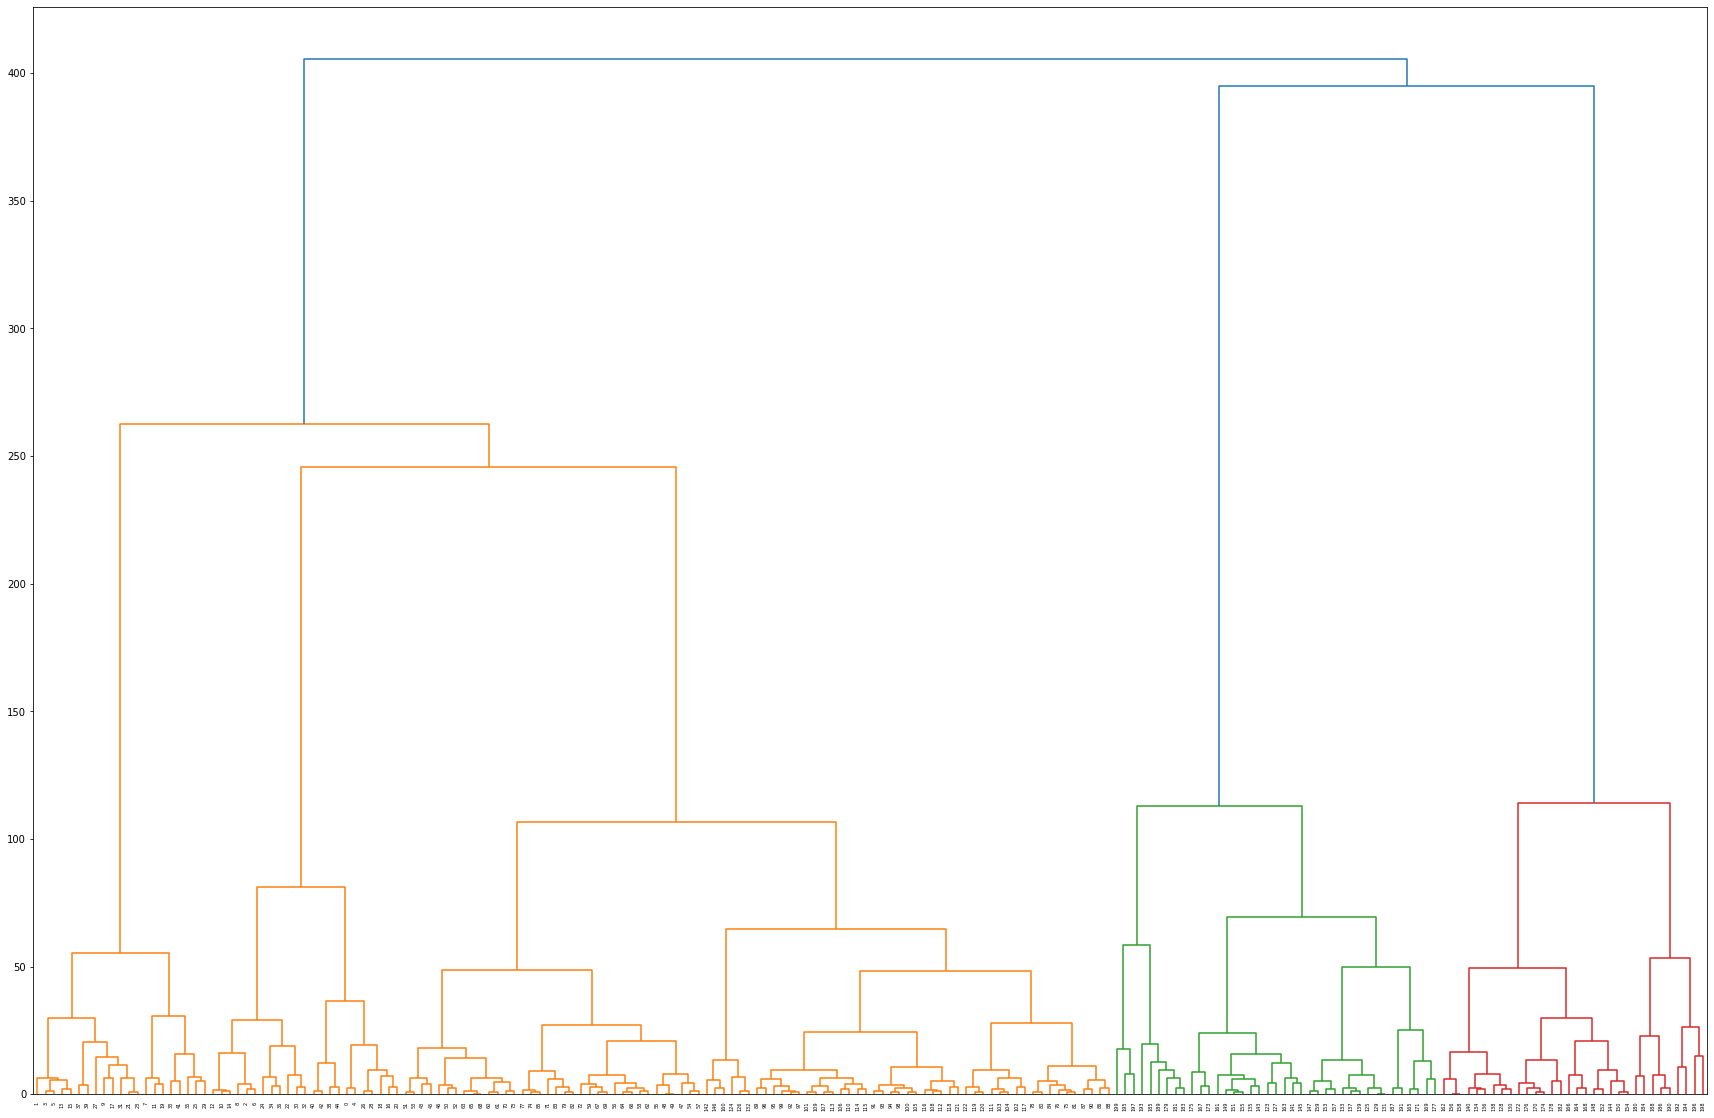

In [27]:
plt.figure(figsize=(30, 20))
dendrogram(linkage_data)
plt.show()

In [28]:
hierarchial_cluster = AgglomerativeClustering(n_clusters=6,affinity='euclidean', linkage='ward')

In [29]:
labels = hierarchial_cluster.fit_predict(data)
print(labels)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 5 0 5 0 1 0 5 0 5 0 5 0 5 0 1 0 5 0 1 0
 5 0 5 0 5 0 5 0 5 0 5 0 1 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 2 0 5 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


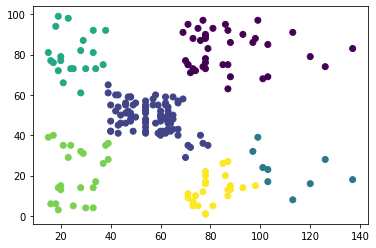

In [30]:
plt.scatter(x,y, c=labels)
plt.show()